In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize
import skimage

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_image_files(container_path, dimension=(104, 104)):

    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "Rice leaves disease detection using SVM"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)

    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [4]:
image_dataset = load_image_files("/content/drive/MyDrive/projects/datasets/bacterical disease/") #Load here dataset
print(image_dataset.target_names)

['Bacterial leaf blight', 'Leaf smut', 'Brown spot']


In [5]:
print(image_dataset.target_names)

['Bacterial leaf blight', 'Leaf smut', 'Brown spot']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [7]:
y_pred = clf.predict(X_test)

In [8]:
print(clf.score(X_test,y_test))

0.6388888888888888


In [9]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}]):
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.42      0.62      0.50         8
           2       0.69      0.56      0.62        16

    accuracy                           0.64        36
   macro avg       0.64      0.65      0.63        36
weighted avg       0.67      0.64      0.65        36




In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[9 2 1]
 [0 5 3]
 [2 5 9]]


In [12]:
print(y_pred)

[0 2 2 2 2 0 0 2 2 0 0 0 1 1 2 0 0 2 1 2 1 1 2 0 2 0 1 1 1 2 1 1 1 1 2 0]


In [13]:
from PIL import Image
import os
def load_image(file):
    dimension=(104, 104)
    image = Image.open(file)
    flat_data = []
    img = skimage.io.imread(file)
    img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
    flat_data.append(img_resized.flatten())
    return image,flat_data

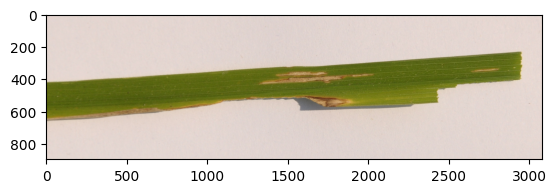

Predicted Disease is Bacterial leaf blight


In [14]:
plot , img = load_image(r'/content/drive/MyDrive/projects/datasets/bacterical disease/Bacterial leaf blight/DSC_0365.JPG')
%matplotlib inline
plt.imshow(plot)
plt.show()
k = image_dataset.target_names
p = clf.predict(img)

s = [str(i) for i in p]
a = int("".join(s))
print("Predicted Disease is", k[a])

In [20]:
import pickle
# now you can save it to a file
with open(r'/content/drive/MyDrive/projects/rice_leaf/model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [21]:

with open(r'/content/drive/MyDrive/projects/rice_leaf/model.pkl', 'rb') as f:
    clf1 = pickle.load(f)

In [22]:
cy = clf1.predict(img)
print(cy)

[0]


In [23]:
import sklearn
print(sklearn.__version__)

1.5.2


# End